# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
!pip install ydata_profiling

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import phik
from phik import phik_matrix
from ydata_profiling import ProfileReport
import re

random.seed(42)
np.random.seed(42)

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here` Сиды фиксируем для воспроизводимости результатов

Ну я не знаю надо ли отвечать, но такая вещь что рандом не рандом, у компьютера есть определенный набор (коллекция) псевдослучанных числе, именно поэтому нам нужно явно указать какой. Иначе будут разные коллекции случаных чисел и разные результаты при их использовании. Поэтому иногда при тестах можно попробовать разные наборы случанных чисел, и результаты могут быть точнее.

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

In [5]:
print(f'Train \n', df_train.isnull().sum())
print(f'\n Test \n',df_test.isnull().sum())

Train 
 name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

 Test 
 name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64


In [6]:
missing_cols =df_train.columns[df_train.isnull().any()].tolist()
missing_cols

['mileage', 'engine', 'max_power', 'torque', 'seats']

**Ваш ответ здесь.**

In [7]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

985
62


In [8]:
profile = ProfileReport(df_train, title="Train Data Profiling Report")

In [ ]:
profile 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Я в определенный момент перезапустил среду, и дашбор перестал строится, 10 мину ждал, ошибок нет перезапуск сервера не помогает. 

На основе дашборда можно сделать несколько интересных выводов. 
Первый из них что Maruti это Maruti Suzuka, дочка индийска 
Поделу дашборд крутая штука
Есть выборы в цене, пробеге, нужно удалить 
Похорошему выделить марку из названия, она идет первая всегда до " " 
Mileage содержит разные метрики, большая часть раход km на литр, но есть и другие 
Нужно достать числовые значения из признаком mileage, engine, max_power, torque + выделить их единици измерения и стандартизировать их. А то корреляция не полная получается, не сравниваем важные признаки.
Есть немного дупликатов дубликатов, в целом ок 
Есть немног пропущенных данных, тоже в целом норм, можем запонить по средним данным, не сильно будет влиять 
Высокая корреляция между цены с типом коробки и годом выпуска 
Год выпуска сильно коррелирует с пробегом

Достаточно много пропущенных, количество дубликатов не так критично.

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

Я честно не люблю все писать в одной ячейке, но давай те попробуем раз написано здесь

In [9]:
# Ваш код здесь

print(f'\nTrain DATA \n',df_train.describe())
print(df_train.describe(include='object'))

print(f'\nTEST DATA \n',df_test.describe())
print(df_test.describe(include='object'))


Train DATA 
               year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000
                          name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power

In [10]:
print(f'\nTrain\n sp',df_train['selling_price'].mean() - df_test['selling_price'].mean())
print(f'year',df_train['year'].mean()-df_test['selling_price'].mean())
print(f'km_driven',df_train['km_driven'].mean()-df_test['km_driven'].mean())
print(f'seats',df_train['seats'].mean()-df_test['seats'].mean()) # Беспонтовый признак

print(f'\nTest\n sp',df_train['selling_price'].median() - df_test['selling_price'].median())
print(f'year',df_train['year'].median()-df_test['selling_price'].median())
print(f'km_driven',df_train['km_driven'].median()-df_test['km_driven'].median())
print(f'seats',df_train['seats'].median()-df_test['seats'].median()) # Беспонтовый признак



Train
 sp 21614.15517102438
year -615887.223597371
km_driven -1808.7254834976484
seats 0.008203085339112626

Test
 sp 15001.0
year -432984.0
km_driven -1500.0
seats 0.0


Основные данные по числовым признакам схожи, mean разница минимальна. Есть выборы как в train так и в test 
Среднее значительно больше медианы для sp и пробегу это говорит о правой асимметрии распределения есть дорогие авто и машины с большим пробегом, которые тянут среднее вверх
Train mean цены ~640K, median ~450K
Test mean цены ~618K, median ~435K
Распределения train и test похожи модель должна хорошо обобщаться.

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [11]:
feature_cols = df_train.columns.drop('selling_price')

In [12]:
duplicates_count = df_train.duplicated(subset=feature_cols, keep='first').sum()
duplicates_count

np.int64(1159)

In [13]:
df_duplicates = df_train[df_train.duplicated(subset=feature_cols, keep=False)].sort_values(by=list(feature_cols))
df_duplicates.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0


In [14]:
df_train = df_train.drop_duplicates(subset=feature_cols, keep='first')
df_train = df_train.reset_index(drop=True)

In [15]:
assert df_train.shape == (5840, 13)

In [16]:
df_test = df_test.drop_duplicates(subset=feature_cols, keep='first')
df_test = df_test.reset_index(drop=True)

Ну есть пару идей.
1. Привести все к одному регистру, + нечеткое сравнение строк чтобы можно было обработать опечатки
2. выделить единицы измерения, и стандартизировать форматы
3. округления, думаю можно все округлить в данном датасете до 0 
4. Обработка сокращений
5. Посмотреть может есть пропуски типа not NaN, и обработать их как Nan

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [17]:
# your code here
def extract_number(value):
    if pd.isna(value):
        return np.nan
    match = re.search(r'[\d.]+', str(value))
    return float(match.group()) if match else np.nan

In [18]:
df_train['mileage'] = df_train['mileage'].apply(extract_number)
df_test['mileage'] = df_test['mileage'].apply(extract_number)

In [19]:
df_train['engine'] = df_train['engine'].apply(extract_number)
df_test['engine'] = df_test['engine'].apply(extract_number)

In [20]:
df_train['max_power'] = df_train['max_power'].apply(extract_number)
df_test['max_power'] = df_test['max_power'].apply(extract_number)

In [21]:
RPM_RE = re.compile(r'([\d,]+)\s*(?:-|~|to)?\s*([\d,]*)?\s*rpm', re.I)
TORQUE_RE = re.compile(r'([\d.]+)\s*(nm|kgm)?', re.I)
KGM_TO_NM = 9.8067

In [22]:
def parse_torque(value):
    if pd.isna(value): 
        return np.nan, np.nan
    s = str(value).lower()
    rpm = np.nan
    if m := RPM_RE.search(s):
        nums = []
        for x in m.groups()[:2]:
            if x: 
                clean_x = x.replace(',', '')   
                num = float(clean_x)          
                nums.append(num)
        rpm = sum(nums) / len(nums)
    
    torque = np.nan
    if m := TORQUE_RE.search(s):
        torque = float(m.group(1))
        if m.group(2) == 'kgm':
            torque *= KGM_TO_NM
    
    return torque, rpm

In [23]:
torque_train = df_train['torque'].apply(parse_torque)
df_train['torque'] = torque_train.apply(lambda x: x[0])
df_train['max_torque_rpm'] = torque_train.apply(lambda x: x[1])

In [24]:
torque_test = df_test['torque'].apply(parse_torque)
df_test['torque'] = torque_test.apply(lambda x: x[0])
df_test['max_torque_rpm'] = torque_test.apply(lambda x: x[1])

In [25]:
print(df_train[['torque', 'max_torque_rpm']].head(10))

      torque  max_torque_rpm
0  190.00000          2000.0
1  250.00000          2000.0
2  219.67008          2250.0
3   11.50000             NaN
4  113.75000          4000.0
5    7.80000             NaN
6   59.00000          2500.0
7  170.00000          2100.0
8  160.00000          2000.0
9  248.00000          2250.0


### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






Медиана устойчива к выбросам. Медиана даёт более типичное значение для заполнения.

По тренировочным данным. Использование статистик из test это утечка данных.

In [26]:
numeric_cols = ['mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'seats']
for col in numeric_cols:
    median_value = df_train[col].median()
    df_train[col] = df_train[col].fillna(median_value)
    df_test[col] = df_test[col].fillna(median_value)

In [27]:
print("Пропуски в train:", df_train.isnull().sum())
print("Пропуски в test:", df_test.isnull().sum())

Пропуски в train: name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64
Пропуски в test: name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64


### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [28]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [29]:
print(df_train[['engine', 'seats']].dtypes)

engine    int64
seats     int64
dtype: object


Все довольно просто, дверей существет ограниченное количество, еще не создали автомобиль с 12 местами. Может быть 1-2-3(бывают гиперкары такие)-4-5-6-7 и так далее, но это ограниченный список, и можно применить onehote метод для них обозначить 0/1 для каждого количество дверей.
+ Сейчас среднее и другие переменные которые описывают seats делают это криво, что такое 5.4 сиденья, для собак или детей ? 
+ Можно выделить типы машин, 2 это купе, 5 стандарт, 4 люкс, >5 минивен 
+ Цена меняется не от количества сидений а именно от разного типа машин

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [30]:
print(f'Train\n',df_train.describe())
print(f'\nTest\n',df_test.describe())

Train
               year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   163.590116     5.426712     2822.853682  
std      31.640418    89.674073     0.982344      934.013885  
min       0.000000     5.700000     2.000000   

Нет не могло, у нас не могло поменяться распределение потому что мы заполняли mean, оно и так в центре, добавление новых переменных которые в центре медианы не сдвигает медиану. + У нас маленький объем, 2%-3% как в море плюнуть.
Поменялись count, данные заполнились, вот mean мог чутка поехать, потому что появились данные которые были раньше пустые, а сейчас там медиана, но это хорошо, он стал лучше

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

А можно мне переобучится, больше знать лучше))


### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

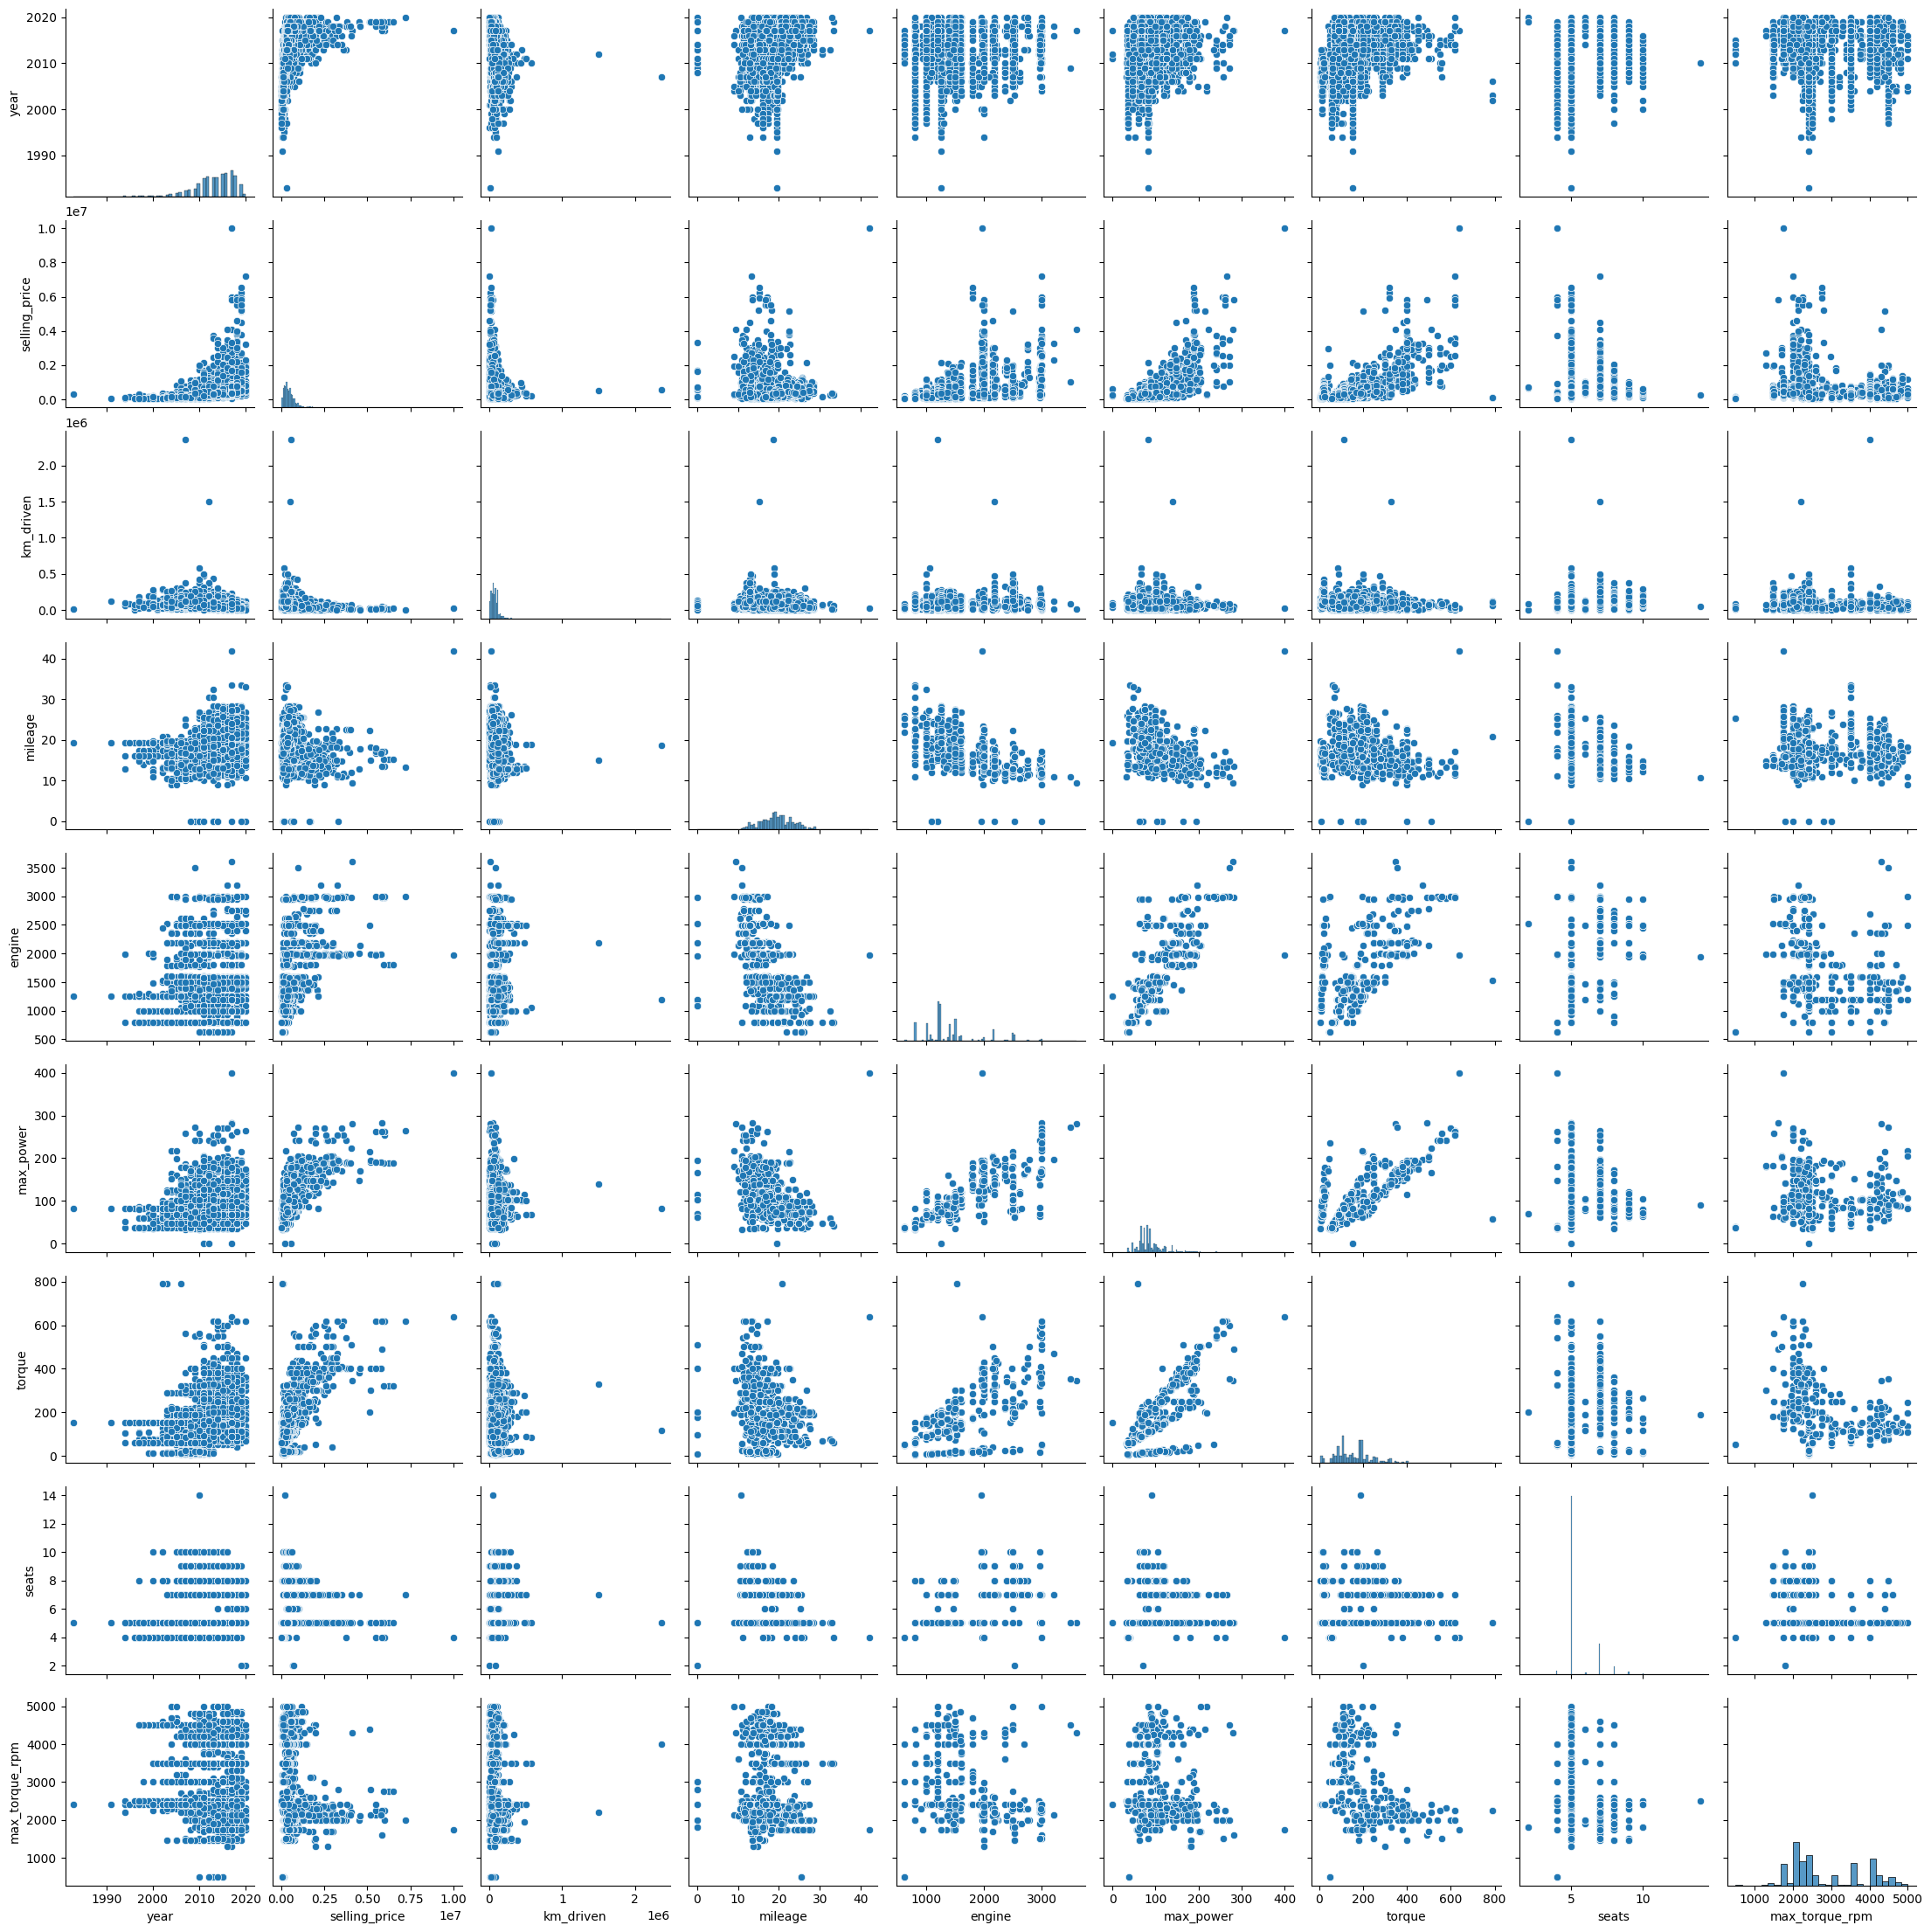

In [31]:
corr_train = sns.pairplot(df_train)
corr_train

1. Да можно заметить что некоторые переменные линейно зависят, то есть до пустим, engine, maxpower вот они увеличиваются, и цена тоже увеличивается, но есть некоторые выбросы, то есть не полная линейная зависимость, поэтому корреляция не 1. 
2. Да можно, но нужно сидеть рассматривать каждый признак и его взаимодейтсвие с другим, что не удобно немного

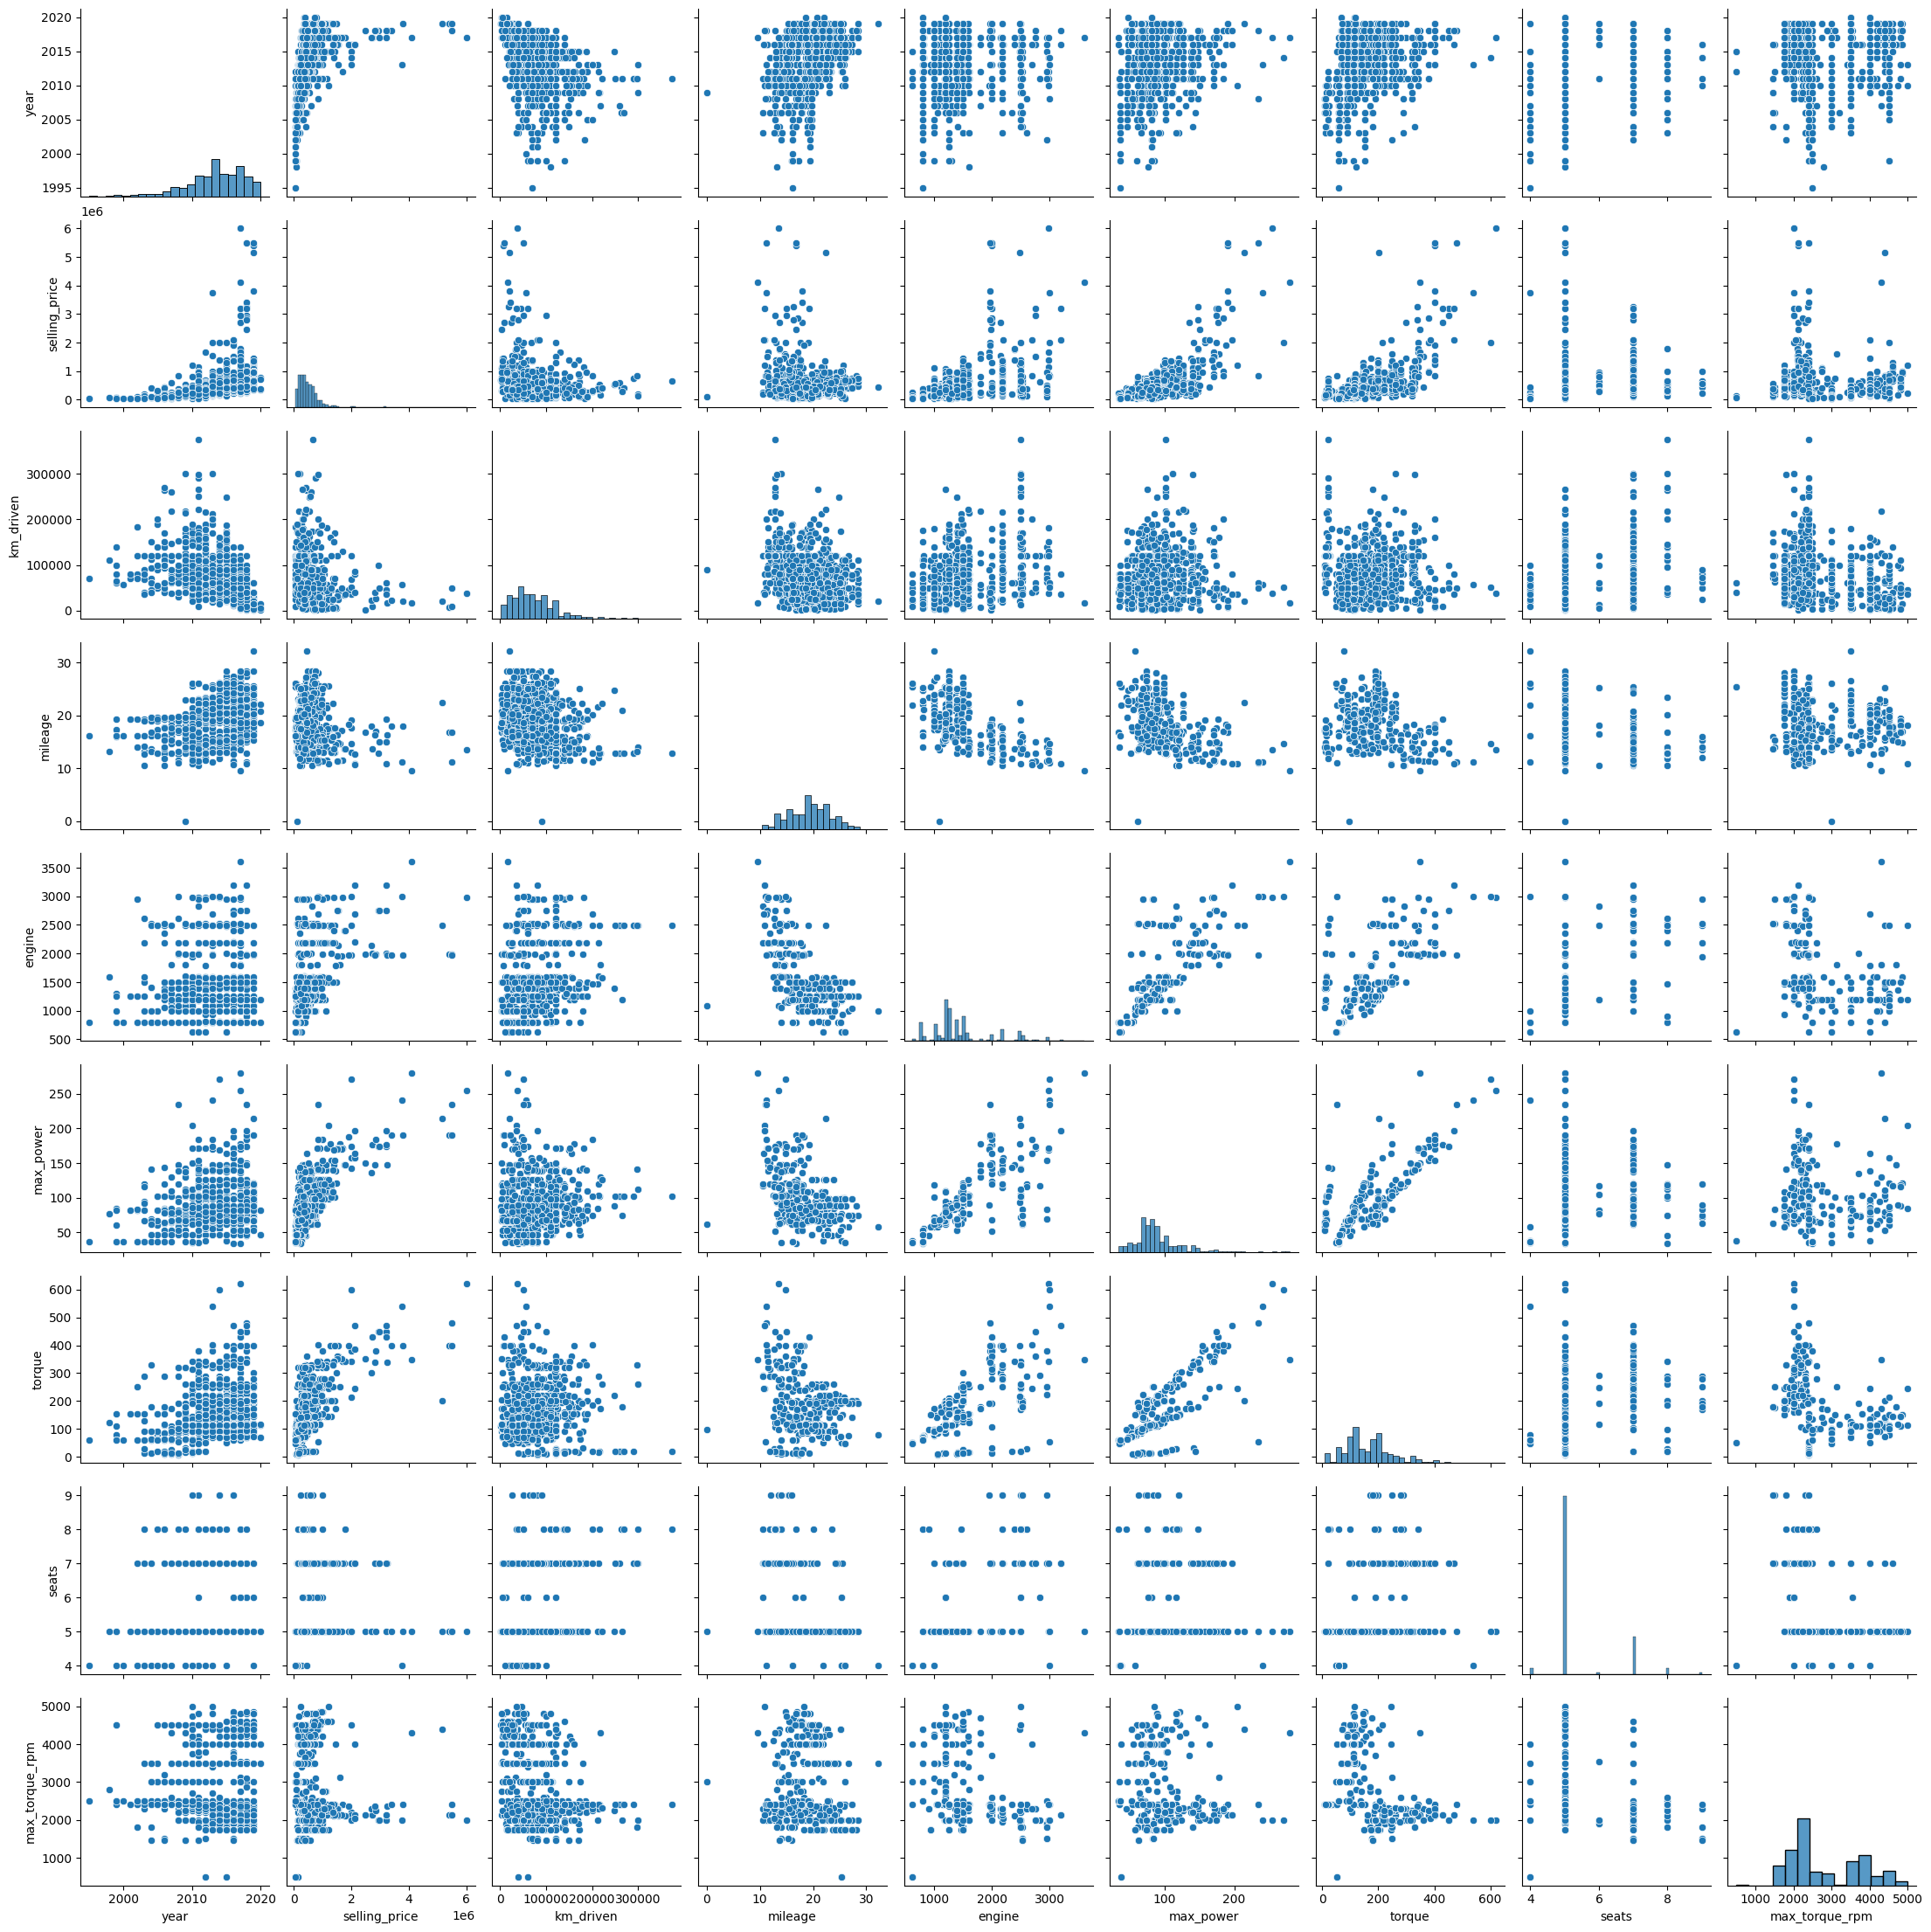

In [32]:
corr_test = sns.pairplot(df_test)
corr_test

На глазок похожи

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

<Axes: >

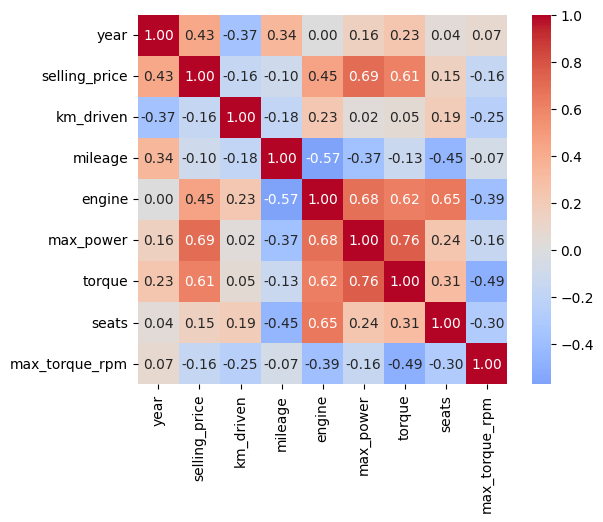

In [91]:
corr_mat_train = df_train.corr(numeric_only=True)
sns.heatmap(
    corr_mat_train,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True
)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

1. Year-Engine,  что логично. Year-seats.
2. Torque-max_power, но они зависят друг от друга, чем больше мощность тем больше крутящий момент, selling_price - max_power, очевидно, engine-max_power, интересно что engine - seats.
3. Да, корреляиця большая, старые машину успели проехать больше к моменту продаж
4. По умолчанию используется Пирсон
Есть еще 
df.corr(method='pearson')  # по умолчанию
df.corr(method='spearman')  # ранговая корреляция Спирмена
df.corr(method='kendall')   # корреляция Кендалла
Пирсон хорош для линейных связей, но чувствителен к выбросам. Спирмен/Кендалл лучше для нелинейных монотонных зависимостей.

`Your answer here`

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [53]:
def kendall_correlation(x, y):
    n = len(x)
    concordant = 0
    discordant = 0
    ties_x = 0
    ties_y = 0
    
    for i in range(n):
        for j in range(i + 1, n):
            dx = x[i] - x[j]
            dy = y[i] - y[j]
            
            sign = dx * dy
            
            if sign > 0:
                concordant += 1
            elif sign < 0:
                discordant += 1
            else:
                if dx == 0:
                    ties_x += 1
                if dy == 0:
                    ties_y += 1
    
    numerator = concordant - discordant
    denominator = np.sqrt((concordant + discordant + ties_x) * 
                          (concordant + discordant + ties_y))
    
    if denominator == 0:
        return 0
    
    return numerator / denominator

In [54]:
def kendall_correlation_matrix(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    n_cols = len(numeric_cols)
    corr_matrix = np.zeros((n_cols, n_cols))
    
    total_pairs = n_cols * (n_cols - 1) // 2
    current = 0
    
    for i, col1 in enumerate(numeric_cols):
        for j, col2 in enumerate(numeric_cols):
            if i == j:
                corr_matrix[i, j] = 1.0
            elif i < j:
                current += 1
                print(f"\rВычисляем {current}/{total_pairs}: {col1} ↔ {col2}...", end="")
                
                x = df[col1].values
                y = df[col2].values
                tau = kendall_correlation(x, y)
                corr_matrix[i, j] = tau
                corr_matrix[j, i] = tau
    
    corr_df = pd.DataFrame(corr_matrix, index=numeric_cols, columns=numeric_cols)
    return corr_df

In [55]:
kendall_matrix = kendall_correlation_matrix(df_train)

Вычисляем 36/36: seats ↔ max_torque_rpm.......m...

<Axes: >

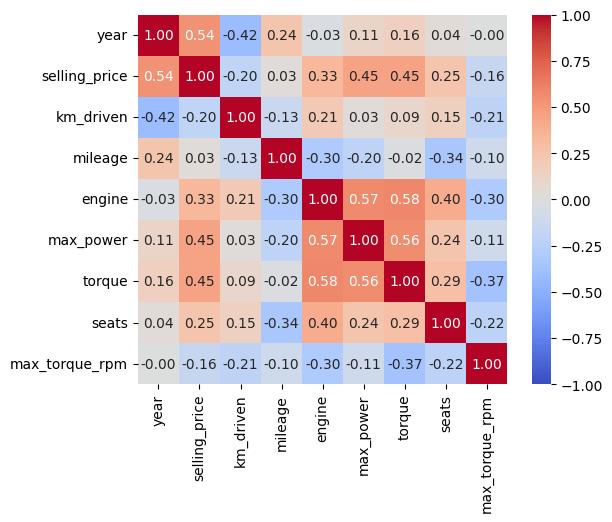

In [56]:
sns.heatmap(kendall_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, vmin=-1, vmax=1)

<Axes: >

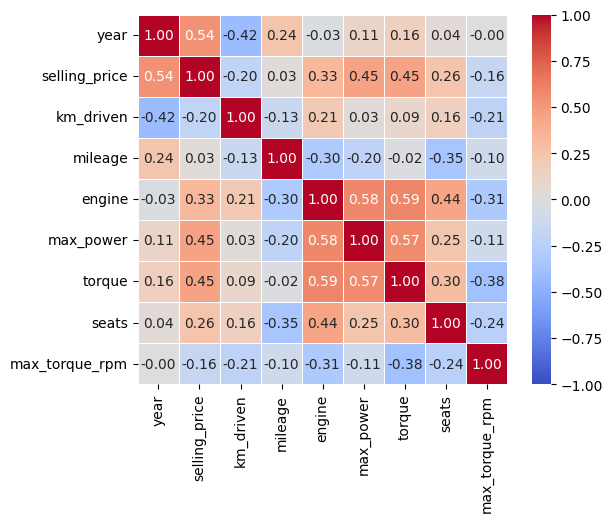

In [92]:
pandas_kendall = df_train.corr(method='kendall',numeric_only=True)
sns.heatmap(pandas_kendall, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, vmin=-1, vmax=1, linewidths=0.5)

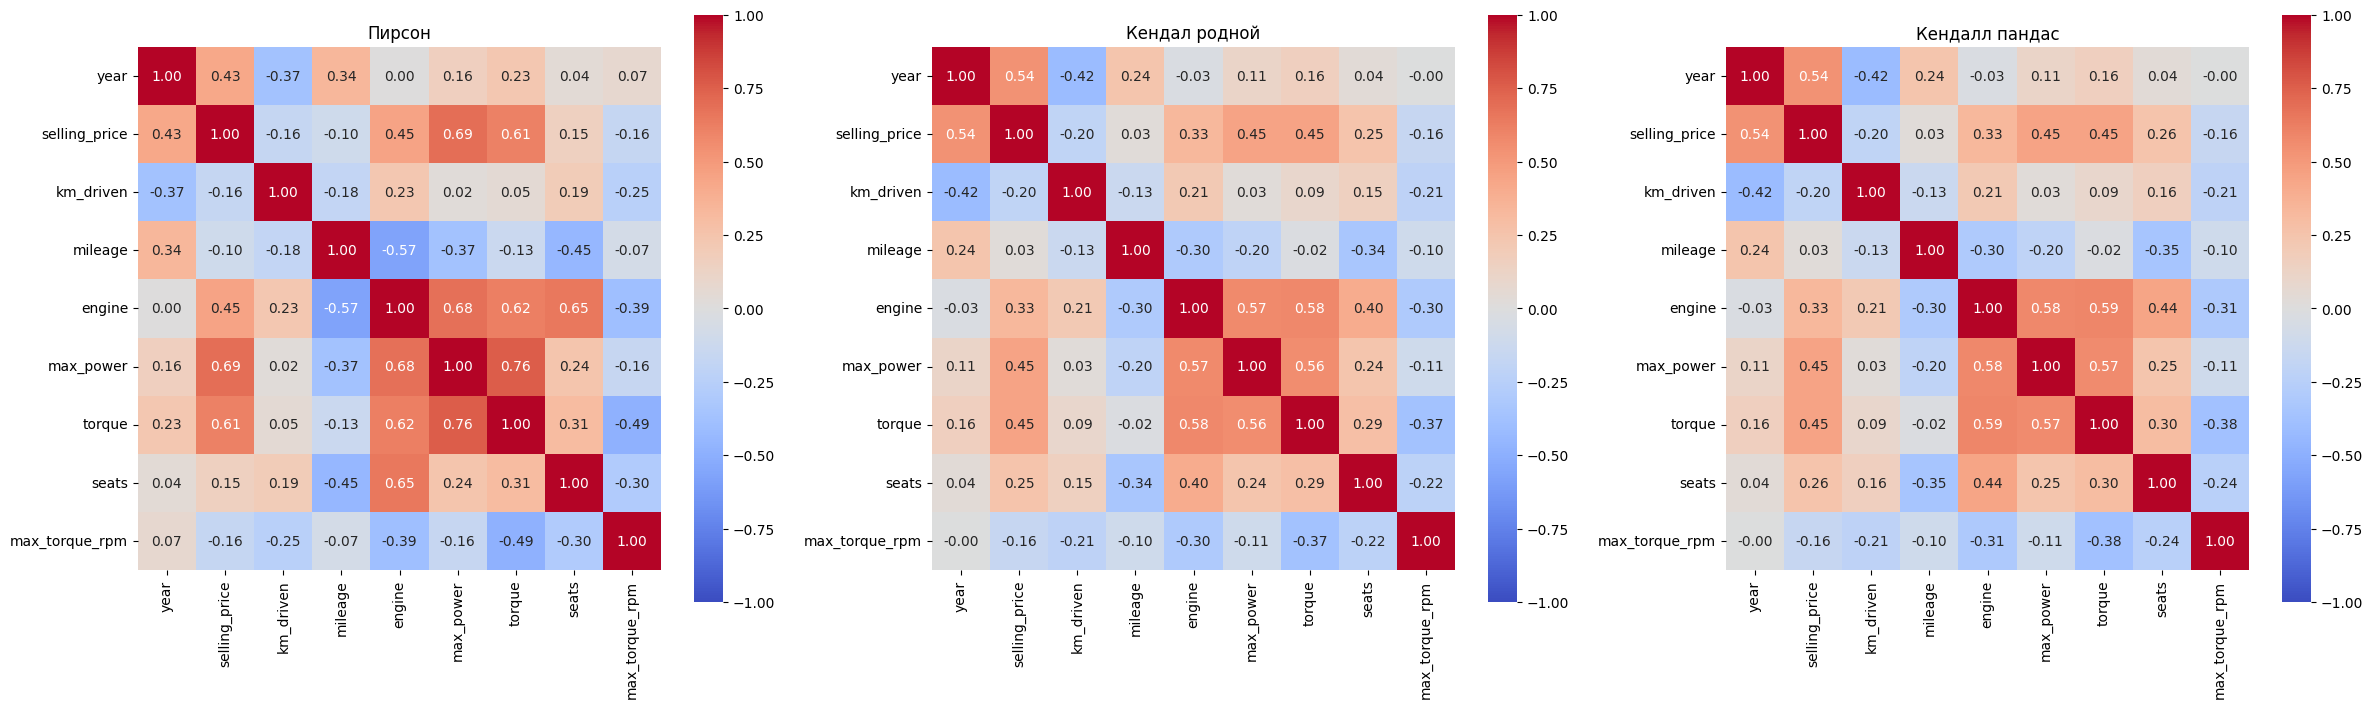

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

sns.heatmap(corr_mat_train, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=axes[0], vmin=-1, vmax=1, square=True)
axes[0].set_title('Пирсон')

sns.heatmap(kendall_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=axes[1], vmin=-1, vmax=1, square=True)
axes[1].set_title('Кендал родной')

sns.heatmap(pandas_kendall, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=axes[2], vmin=-1, vmax=1, square=True)
axes[2].set_title('Кендалл пандас')

plt.tight_layout()
plt.show()

Моя реализация Кендалла совпадаетс с библиотечной до 0.01, но работает в разы дольше
Кендалл > Пирсон, year - selling_price потому что зависимость монотонная, но нелинейная, +есть выбросы, которые смещают Пирсона
Кендал  +- Пирсон, max_power-year, torque-year
Для большинства пар признаков все два метода дают похожие результаты, следовательно зависимости близки к линейным

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


C:\Users\petrc\AppData\Roaming\Python\Python312\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


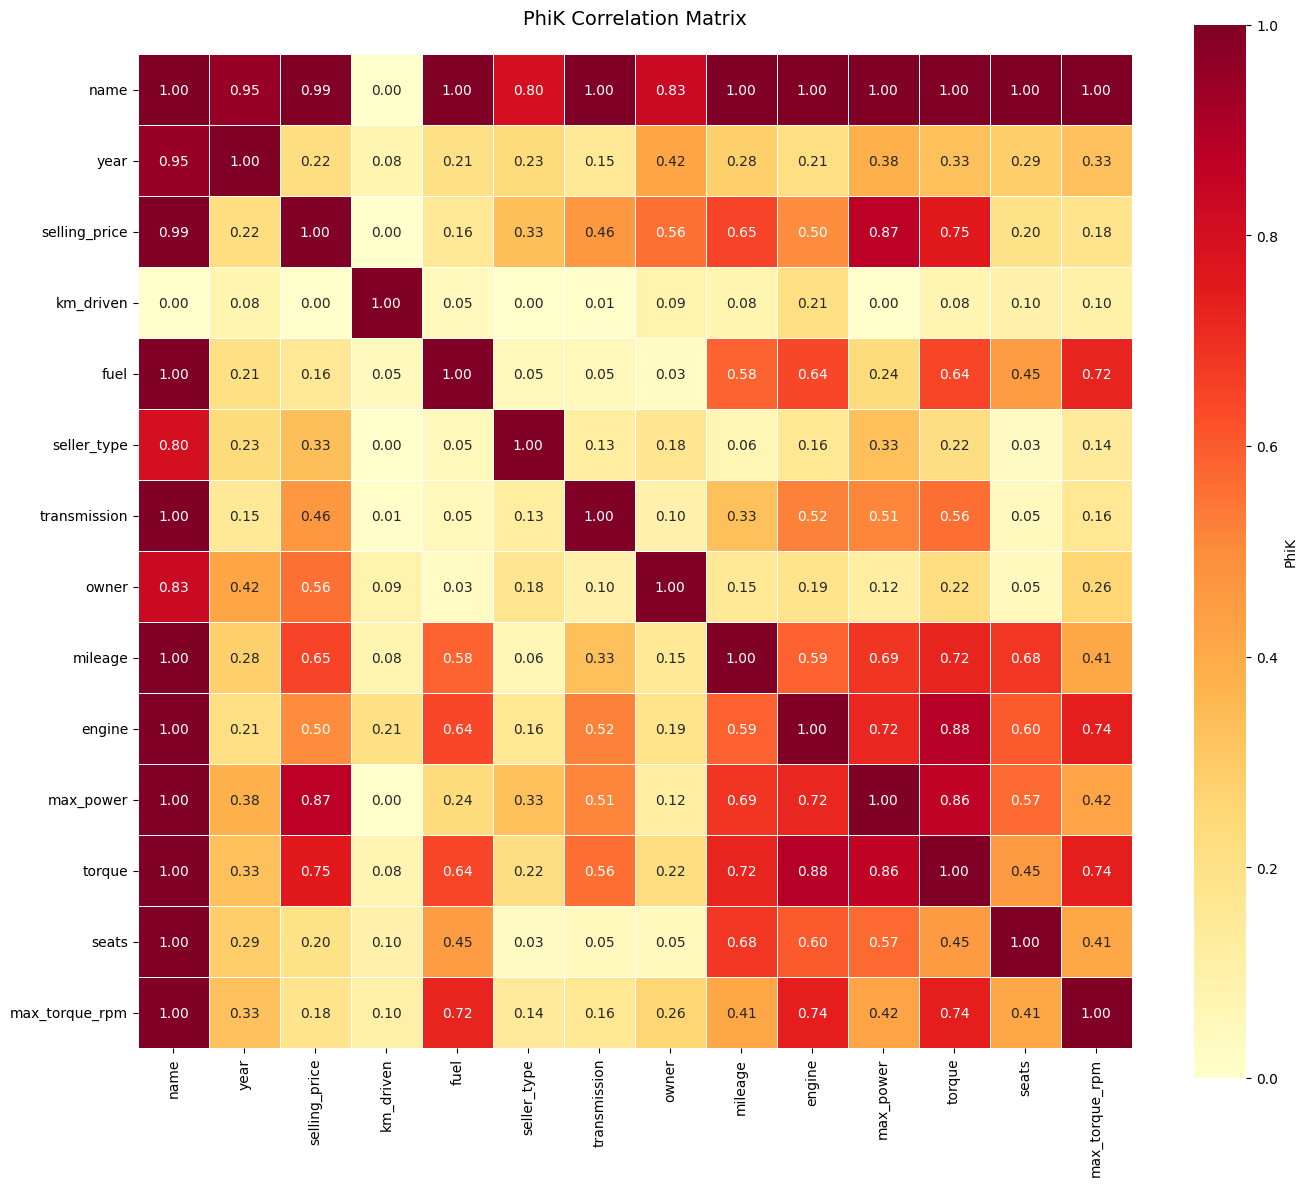

In [35]:
phik_matrix = df_train.phik_matrix()

plt.figure(figsize=(14, 12))
sns.heatmap(phik_matrix, annot=True, fmt='.2f', cmap='YlOrRd', 
            square=True, vmin=0, vmax=1, linewidths=0.5, cbar_kws={'label': 'PhiK'})
plt.title('PhiK Correlation Matrix\n', fontsize=14)
plt.tight_layout()
plt.show()

Почитал я что за чудо Phik, это универсальная мера корреляции для любых типов данных (числовые + категориальные). То есть корреляция на максимальках.
У нас есть сильные связи, selling_price с torque, max_power, milage, что логично, мощные машины дороже стоят и кушают больше топлива.
Torque и max_torque коррелируют с fuel, дизуль обычно имееть больше крутящего момента. + сюда же engine, они часто больше
Owner - selling_price первый владелец = выше цена
transmission - selling_price автомат дороже механики
Вообщем главное отличие и польза PhiK от Пирсона, заключается в том первый может измерять связь между категориальными признаками, что невозможно для классических корреляций. Это особенно полезно для понимания влияния категориальных признаков на целевую переменную selling_price.

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

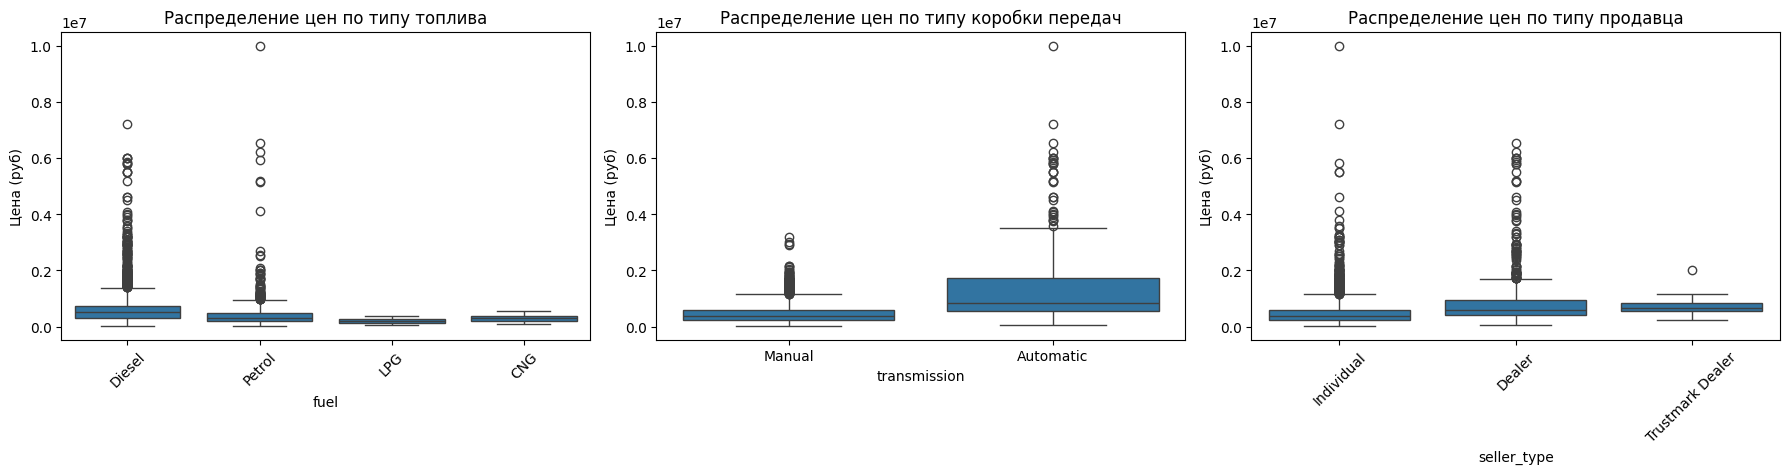

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df_train, x='fuel', y='selling_price', ax=axes[0])
axes[0].set_title('Распределение цен по типу топлива')
axes[0].set_ylabel('Цена (руб)')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df_train, x='transmission', y='selling_price', ax=axes[1])
axes[1].set_title('Распределение цен по типу коробки передач')
axes[1].set_ylabel('Цена (руб)')

sns.boxplot(data=df_train, x='seller_type', y='selling_price', ax=axes[2])
axes[2].set_title('Распределение цен по типу продавца')
axes[2].set_ylabel('Цена (руб)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

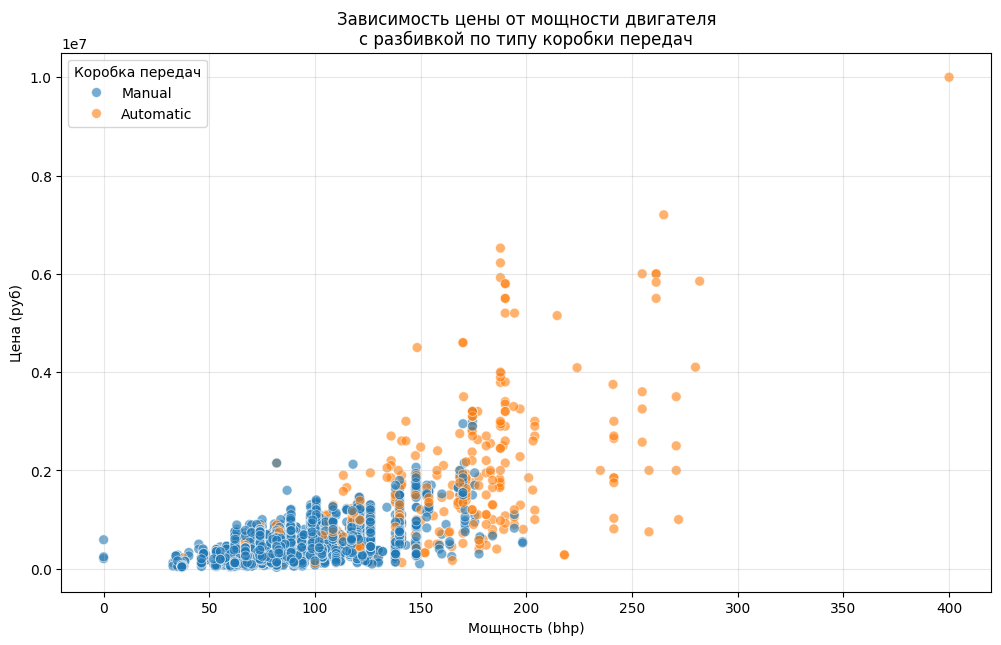

In [69]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_train, x='max_power', y='selling_price', 
                hue='transmission', alpha=0.6, s=50)
plt.xlabel('Мощность (bhp)')
plt.ylabel('Цена (руб)')
plt.title('Зависимость цены от мощности двигателя\nс разбивкой по типу коробки передач')
plt.legend(title='Коробка передач')
plt.grid(True, alpha=0.3)
plt.show()

Первая визуализация представляет собой три ящика с усами, демонстрирующие распределение цен автомобилей в зависимости от категориальных признаков. Анализ графика по типу топлива показывает, что автомобили на дизельном топливе имеют более широкий разброс цен и в среднем стоят дороже, чем бензиновые, что может быть связано с тем, что дизельные двигатели чаще устанавливаются на более мощные и дорогие модели. При рассмотрении распределения цен по типу коробки передач становится очевидным, что автомобили с автоматической коробкой передач имеют значительно более высокую медианную цену и более широкий диапазон цен по сравнению с механической коробкой. 3 график показывает интересную закономерность официальные дилеры продают автомобили по более высоким ценам с меньшим разбросом, в то время как частные продавцы показывают более широкий диапазон цен.

Вторая визуализация представляет собой диаграмму рассеивания, показывающую зависимость цены от мощности двигателя. Этот график позволяет выявить нелинейную зависимость между мощностью и ценой, а также показывает, что для автомобилей с автоматической коробкой передач наблюдается более сильная положительная корреляция между мощностью и ценой. Интересно отметить, что при одинаковой мощности автомобили с автоматической коробкой передач, как правило, стоят дороже, что подтверждает выводы из первой визуализации о премиальности автоматических трансмиссий.


# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [37]:
df_train_numeric = df_train.select_dtypes(include=[np.number]).copy()
df_test_numeric = df_test.select_dtypes(include=[np.number]).copy()

y_train = df_train_numeric['selling_price']
X_train = df_train_numeric.drop(columns=['selling_price'])

In [ ]:
print("Признаки X_train", X_train.columns.tolist())
print("Размер X_train", X_train.shape)
print("Размер y_train", y_train.shape)

Признаки X_train: ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']
Размер X_train: (5840, 8)
Размер y_train: (5840,)


In [ ]:
y_test = df_test_numeric['selling_price']
X_test = df_test_numeric.drop(columns=['selling_price'])

print("Размер X_test", X_test.shape)
print("Размер y_test", y_test.shape)

Размер X_test: (931, 8)
Размер y_test: (931,)


### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
# Зачем тут дан R2_score если есть встроенный score ?
reg = LinearRegression().fit(X_train, y_train)

print(f'R2 на train = ',reg.score(X_train, y_train))
print(f'R2 на test = ',reg.score(X_test, y_test))

print(f'R2 на train = ',r2_score(y_train, reg.predict(X_train)))
print(f'R2 на test = ',r2_score(y_test, reg.predict(X_test)))

print(f'\nMSE на train = ', MSE(y_train, reg.predict(X_train)))
print(f'MSE на test = ', MSE(y_test, reg.predict(X_test)))

print(f'\nКоэффициенты ', reg.coef_)

R2 на train =  0.602122020741267
R2 на test =  0.6254152525567269
R2 на train =  0.602122020741267
R2 на test =  0.6254152525567269

MSE на train =  114047082843.91687
MSE на test =  134129581188.86406

Коэффициенты  [ 4.00685424e+04 -8.18775701e-01 -3.07348683e+03  3.28040573e+01
  9.63824266e+03  3.80984686e+02 -3.36739224e+04 -5.53423321e+01]


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [57]:
def r2_m(y_true, y_pred):
    y_true = np.array(y_true) 
    y_pred = np.array(y_pred)
    
    ss_res = np.sum((y_true - y_pred) ** 2) # Сумма ошибка модели, то есть насколько сильно отличаются предсказания модели от реальных данных 
    # квадрат нужен чтобы ошибки не компенсировалиись
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2) # Измеряем насколько каждое реальное значение отклоняется от среднего, возводим в квадрат и суммируем.
    
    return 1 - ss_res / ss_tot

In [58]:
print(f'R2 на train = ',r2_score(y_train, reg.predict(X_train)))
print(f'R2 на test = ',r2_score(y_test, reg.predict(X_test)))

print(f'R2 my на train = ',r2_m(y_train, reg.predict(X_train)))
print(f'R2 my на test = ',r2_m(y_test, reg.predict(X_test)))

R2 на train =  0.602122020741267
R2 на test =  0.6254152525567269
R2 my на train =  0.602122020741267
R2 my на test =  0.6254152525567269


R2 = 1 - SS_res / SS_tot
SS_res = sum((y_true - y_pred)^2) сумма квадратов остатков. y_true это реальное значение, y_pred это предсказание модели. Разность между ними это ошибка модели на конкретном объекте. SS_res показывает суммарную ошибку модели.
SS_tot = sum((y_true - mean(y_true))^2) общая сумма квадратов. mean(y_true) это среднее значение целевой переменной. SS_tot показывает общую вариацию в данных.
SS_res / SS_tot доля необъясненной вариации
1 - SS_res / SS_tot доля объясненной вариации, это R2 какую часть вариации целевой переменной модель смогла объяснить с помощью признаков

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [59]:
def adjusted_r2(y_true, y_pred, n_features):
    n = len(y_true)  
    p = n_features  
    
    r2 = r2_m(y_true, y_pred)
    
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adj_r2

In [60]:
print(f'R2 на train = ',r2_score(y_train, reg.predict(X_train)))
print(f'R2 на test = ',r2_score(y_test, reg.predict(X_test)))

n_features = X_train.shape[1]
print(f'adjusted_r2 на train = ',adjusted_r2(y_train, reg.predict(X_train), n_features))
print(f'adjusted_r2 на test = ',adjusted_r2(y_test, reg.predict(X_test), n_features))

R2 на train =  0.602122020741267
R2 на test =  0.6254152525567269
adjusted_r2 на train =  0.601576141160737
adjusted_r2 на test =  0.6221650595203427


Adjusted R2 = 1 - (1 - R2) * (n - 1) / (n - p - 1)
Обычный R всегда растет при добавлении новых признаков, даже если они бесполезны. Это происходит потому что модель с большим числом параметров всегда может лучше подстроиться под данные, но это не значит что она лучше обобщается. Adjusted R решает эту проблему он штрафует модель за каждый добавленный признак. Если новый признак не дает достаточного прироста в качестве, Adjusted R может даже уменьшиться. Поэтому Adjusted R используют при сравнении моделей с разным количеством признаков он показывает, действительно ли добавление признака улучшило модель или это просто переобучение.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [66]:
reg_scaled = LinearRegression().fit(X_train_scaled, y_train)

print(f'R2 на train = ',r2_score(y_train, reg_scaled.predict(X_train_scaled)))
print(f'R2 на test = ',r2_score(y_test, reg_scaled.predict(X_test_scaled)))

print(f'\nMSE на train = ', MSE(y_train, reg_scaled.predict(X_train_scaled)))
print(f'MSE на test = ', MSE(y_test, reg_scaled.predict(X_test_scaled)))

R2 на train =  0.6021220207412661
R2 на test =  0.6254152525567257

MSE на train =  114047082843.91713
MSE на test =  134129581188.86452


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [67]:
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': reg_scaled.coef_,
    'abs_coefficient': np.abs(reg_scaled.coef_)
}).sort_values('abs_coefficient', ascending=False)

print(coef_df)

          feature    coefficient  abs_coefficient
4       max_power  304931.919068    304931.919068
0            year  164091.550839    164091.550839
7  max_torque_rpm  -51686.080869     51686.080869
1       km_driven  -49180.575683     49180.575683
5          torque   34161.523487     34161.523487
6           seats  -33076.541710     33076.541710
3          engine   15930.347335     15930.347335
2         mileage  -12249.787097     12249.787097


Получается что для предскаазания цены самый информативный признак это max_power и year. Что логично мощнее новее = дороже

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [68]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

print('R2 на train =', lasso.score(X_train_scaled, y_train))
print('R2 на test =', lasso.score(X_test_scaled, y_test))

print('\nMSE на train =', MSE(y_train, lasso.predict(X_train_scaled)))
print('MSE на test =', MSE(y_test, lasso.predict(X_test_scaled)))

R2 на train = 0.6021220206935151
R2 на test = 0.6254144801809066

MSE на train = 114047082857.60442
MSE на test = 134129857757.64058


In [69]:
coef_lasso = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lasso.coef_
})
print('\nКоэффициенты Lasso = ', coef_lasso)


Коэффициенты Lasso =            feature    coefficient
0            year  164089.155393
1       km_driven  -49179.642733
2         mileage  -12246.361816
3          engine   15928.693457
4       max_power  304932.870922
5          torque   34161.809290
6           seats  -33072.580704
7  max_torque_rpm  -51683.609826


In [73]:
coef_lasso[coef_lasso['coefficient'] == 0]

,feature,coefficient


L1 регулиризация не занулила веса, потому чо значение alpha очень маленькре для целевой переменной, нам нужно поставить больший alpha параметр, тогда будет больше штраф за нулевые веса

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000] # взял чуть больше чем в лекции
}
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=10, scoring='r2', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
             return_train_score=True, scoring='r2')

In [86]:
print('Лучшие параметры=', grid_search.best_params_)
print('Лучший R2 на кросс-валидации=', grid_search.best_score_)

Лучшие параметры= {'alpha': 10000}
Лучший R2 на кросс-валидации= 0.5816303994646255


In [87]:
best_lasso = grid_search.best_estimator_
print('\nR2 на train = ', best_lasso.score(X_train_scaled, y_train))
print('R2 на test = ', best_lasso.score(X_test_scaled, y_test))



R2 на train =  0.5994213943982543
R2 на test =  0.6173398691862833


In [90]:
coef_best = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': best_lasso.coef_
})
print(f'\nКоэффициенты лучшей модели =\n',coef_best)


Коэффициенты лучшей модели =
           feature    coefficient
0            year  149738.911140
1       km_driven  -39656.422803
2         mileage       0.000000
3          engine       0.000000
4       max_power  304295.034187
5          torque   39513.050509
6           seats   -4257.074026
7  max_torque_rpm  -32614.299808


In [89]:
coef_best[coef_best['coefficient'] == 0]

,feature,coefficient
2,mileage,0.0
3,engine,0.0


1. Получается что грид серчу пришлось обучать 10 (кол-во фолодов) * количетсво alpha = 10 * 8 = 80
2. Альфа это коэффициент регуляризации в Лассо, определяет силу штрафа за нулевые весы, чем больше штраф тем сильнее модель будет занулять веса 
3. Лучший 10000, занулилсь mileage, engine 

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [93]:
from sklearn.linear_model import ElasticNet

In [94]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [95]:
elastic = ElasticNet()
grid_search_elastic = GridSearchCV(elastic, param_grid, cv=10, scoring='r2', return_train_score=True)
grid_search_elastic.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             return_train_score=True, scoring='r2')

In [96]:
print('Лучшие параметры = ', grid_search_elastic.best_params_)
print('Лучший R2 =', grid_search_elastic.best_score_)

Лучшие параметры =  {'alpha': 1, 'l1_ratio': 0.9}
Лучший R2 = 0.5818166901815991


In [97]:
best_elastic = grid_search_elastic.best_estimator_
print('\nR2 на train = ', best_elastic.score(X_train_scaled, y_train))
print('R2 на test = ', best_elastic.score(X_test_scaled, y_test))

print('\nMSE на train = ', MSE(y_train, best_elastic.predict(X_train_scaled)))
print('MSE на test = ', MSE(y_test, best_elastic.predict(X_test_scaled)))


R2 на train =  0.5970407828136997
R2 на test =  0.6147147393792758

MSE на train =  115503560440.27583
MSE на test =  137961171665.50192


Пришлось обучать 8 * 5 * 10 = 400 моделей
Лучшие параметры (alpha=1, l1_ratio=0.9)

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [98]:
from itertools import combinations

In [102]:
def l0_regression(X, y, max_features):
    best_score = -np.inf
    best_features = None
    best_model = None
    
    for k in range(1, max_features + 1):
        for features in combinations(range(X.shape[1]), k):
            X_sub = X.iloc[:, list(features)] 
            model = LinearRegression().fit(X_sub, y)
            score = model.score(X_sub, y)
            
            if score > best_score:
                best_score = score
                best_features = features
                best_model = model
                
    return best_model, best_features

In [104]:
for max_f in range(1, X_train.shape[1]+1):
    model, features = l0_regression(X_train_scaled, y_train, max_f)
    
    X_train_sub = X_train_scaled.iloc[:, list(features)]
    X_test_sub = X_test_scaled.iloc[:, list(features)]
    
    print(f"\nmax_features={max_f}")
    print(f"\nПризнаки = {[X_train.columns[i] for i in features]}")
    print(f"\nR2 train =  {model.score(X_train_sub, y_train):.4f}")
    print(f"\nR2 test =  {model.score(X_test_sub, y_test):.4f}\n")


max_features=1

Признаки = ['max_power']

R2 train =  0.4800

R2 test =  0.5165


max_features=2

Признаки = ['year', 'max_power']

R2 train =  0.5841

R2 test =  0.6043


max_features=3

Признаки = ['year', 'max_power', 'max_torque_rpm']

R2 train =  0.5919

R2 test =  0.6067


max_features=4

Признаки = ['year', 'km_driven', 'max_power', 'max_torque_rpm']

R2 train =  0.5995

R2 test =  0.6208


max_features=5

Признаки = ['year', 'km_driven', 'max_power', 'seats', 'max_torque_rpm']

R2 train =  0.6005

R2 test =  0.6223


max_features=6

Признаки = ['year', 'km_driven', 'max_power', 'torque', 'seats', 'max_torque_rpm']

R2 train =  0.6015

R2 test =  0.6238


max_features=7

Признаки = ['year', 'km_driven', 'mileage', 'max_power', 'torque', 'seats', 'max_torque_rpm']

R2 train =  0.6019

R2 test =  0.6253


max_features=8

Признаки = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']

R2 train =  0.6021

R2 test =  0.6254



Самый важный признак это max_power, он является главным признаком для предсказания цены, дает 48% точность 
Добавление года выпуска, прибавило 10% в точности
Остальные внесли минимальный прирост
Можно выделить 4 признака, ['year', 'km_driven', 'max_power', 'max_torque_rpm'/'seats]. Max_torque_rpm связан с max_power, его можно выкинуть в целом. Набор этих признаком дает R = 0.62, использование оставишхся почти не добавляет точности.

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [105]:
df_train['name'].head(10)

0                  Maruti Swift Dzire VDI
1            Skoda Rapid 1.5 TDI Ambition
2               Hyundai i20 Sportz Diesel
3                  Maruti Swift VXI BSIII
4           Hyundai Xcent 1.2 VTVT E Plus
5            Maruti Wagon R LXI DUO BSIII
6                      Maruti 800 DX BSII
7                        Toyota Etios VXD
8    Ford Figo Diesel Celebration Edition
9         Renault Duster 110PS Diesel RxL
Name: name, dtype: object

In [107]:
df_train['name'].nunique()

1924

In [108]:
df_train['brand'] = df_train['name'].str.split().str[0]
df_test['brand'] = df_test['name'].str.split().str[0]

In [109]:
df_train['brand'].nunique()

30

In [110]:
df_train['brand'].value_counts().head(10)

brand
Maruti        1804
Hyundai       1058
Mahindra       611
Tata           534
Toyota         309
Ford           308
Honda          308
Chevrolet      188
Renault        171
Volkswagen     153
Name: count, dtype: int64

In [118]:
numeric_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']

In [119]:
cat_cols = ['brand', 'fuel', 'seller_type', 'transmission']

In [120]:
X_train_cat = df_train[numeric_cols + cat_cols].copy()
X_test_cat = df_test[numeric_cols + cat_cols].copy()

In [121]:
X_train_cat.shape

(5840, 11)

In [123]:
X_train_cat.columns.tolist()

['year',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'seats',
 'brand',
 'fuel',
 'seller_type',
 'transmission']

In [124]:
assert X_train_cat.shape == (5840, 11) #  я не понял почему тут хотят 11. Пришлось исключить парочку ну ладно 

In [125]:
X_train_cat.describe(include='object')

,brand,fuel,seller_type,transmission
count,5840,5840,5840,5840
unique,30,4,3,2
top,Maruti,Diesel,Individual,Manual
freq,1804,3177,5223,5336


### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [127]:
ohe_cols = ['brand', 'fuel', 'seller_type', 'transmission', 'seats']
num_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque']

In [128]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train_cat[ohe_cols])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [129]:
X_train_ohe = ohe.transform(X_train_cat[ohe_cols])
X_test_ohe = ohe.transform(X_test_cat[ohe_cols])

ohe_feature_names = ohe.get_feature_names_out(ohe_cols)

X_train_final = pd.concat([
    X_train_cat[num_cols].reset_index(drop=True),
    pd.DataFrame(X_train_ohe, columns=ohe_feature_names)
], axis=1)

X_test_final = pd.concat([
    X_test_cat[num_cols].reset_index(drop=True),
    pd.DataFrame(X_test_ohe, columns=ohe_feature_names)
], axis=1)


C:\Users\petrc\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [130]:
X_train_final.shape

(5840, 49)

In [131]:
X_train_final.columns.tolist()

['year',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'brand_Audi',
 'brand_BMW',
 'brand_Chevrolet',
 'brand_Daewoo',
 'brand_Datsun',
 'brand_Fiat',
 'brand_Force',
 'brand_Ford',
 'brand_Honda',
 'brand_Hyundai',
 'brand_Isuzu',
 'brand_Jaguar',
 'brand_Jeep',
 'brand_Kia',
 'brand_Land',
 'brand_Lexus',
 'brand_MG',
 'brand_Mahindra',
 'brand_Maruti',
 'brand_Mercedes-Benz',
 'brand_Mitsubishi',
 'brand_Nissan',
 'brand_Peugeot',
 'brand_Renault',
 'brand_Skoda',
 'brand_Tata',
 'brand_Toyota',
 'brand_Volkswagen',
 'brand_Volvo',
 'fuel_Diesel',
 'fuel_LPG',
 'fuel_Petrol',
 'seller_type_Individual',
 'seller_type_Trustmark Dealer',
 'transmission_Manual',
 'seats_4',
 'seats_5',
 'seats_6',
 'seats_7',
 'seats_8',
 'seats_9',
 'seats_10',
 'seats_14']

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

One got encoding нужно обучать только на train данныих и применять к обоим датасетам. После нужно выровнять столбцы. 
Чтобы избежать мультиколлинеарности, чтобы матрица не становилас вырожденой.
Нет, так нельзя делать, мы потеряем информацию о различиии между категориями

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

In [135]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler_cat = StandardScaler()

X_train_cat_scaled = scaler_cat.fit_transform(X_train_final)
X_test_cat_scaled = scaler_cat.transform(X_test_final)

In [136]:
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=10, scoring='r2')
grid_search_ridge.fit(X_train_cat_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
             scoring='r2')

In [137]:
print('Лучший a =', grid_search_ridge.best_params_)
print('Лучший R2 =', grid_search_ridge.best_score_)

Лучший a = {'alpha': 1000}
Лучший R2 = 0.7062350835247553


In [138]:
best_ridge = grid_search_ridge.best_estimator_
print('\nR2 на train =', best_ridge.score(X_train_cat_scaled, y_train))
print('R2 на test =', best_ridge.score(X_test_cat_scaled, y_test))

print('\nMSE на train =', MSE(y_train, best_ridge.predict(X_train_cat_scaled)))
print('MSE на test =', MSE(y_test, best_ridge.predict(X_test_cat_scaled)))


R2 на train = 0.7438529379701655
R2 на test = 0.7833955899081144

MSE на train = 73421568235.48624
MSE на test = 77560709579.30649


Да и причем существенно, почти на 20%. Можно сделать вывод что категориальные признаки несут важную информацию о том из чего строиться цена автомабиля и довольно сильно ее определяют

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [139]:
df_train_fe = df_train.copy()
df_test_fe = df_test.copy()

In [140]:
df_train_fe['power_per_liter'] = df_train_fe['max_power'] / (df_train_fe['engine'] / 1000)
df_test_fe['power_per_liter'] = df_test_fe['max_power'] / (df_test_fe['engine'] / 1000)

In [141]:
df_train_fe['year_squared'] = df_train_fe['year'] ** 2
df_test_fe['year_squared'] = df_test_fe['year'] ** 2

In [142]:
df_train_fe['age'] = 2025 - df_train_fe['year']
df_test_fe['age'] = 2025 - df_test_fe['year']

In [143]:
df_train_fe['km_per_year'] = df_train_fe['km_driven'] / df_train_fe['age'].replace(0, 1)
df_test_fe['km_per_year'] = df_test_fe['km_driven'] / df_test_fe['age'].replace(0, 1)

In [144]:
df_train_fe['is_first_owner'] = (df_train_fe['owner'] == 'First Owner').astype(int)
df_test_fe['is_first_owner'] = (df_test_fe['owner'] == 'First Owner').astype(int)

In [145]:
df_train_fe['many_owners'] = df_train_fe['owner'].isin(['Third Owner', 'Fourth & Above Owner']).astype(int)
df_test_fe['many_owners'] = df_test_fe['owner'].isin(['Third Owner', 'Fourth & Above Owner']).astype(int)

In [146]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [147]:
df_train_fe['log_km'] = np.log1p(df_train_fe['km_driven'])
df_test_fe['log_km'] = np.log1p(df_test_fe['km_driven'])

In [148]:
df_train_fe[['power_per_liter', 'year_squared', 'age', 'km_per_year', 'is_first_owner', 'log_km']].head()

,power_per_liter,year_squared,age,km_per_year,is_first_owner,log_km
0,59.294872,4056196,11,13227.272727,1,11.887938
1,69.105474,4056196,11,10909.090909,0,11.695255
2,64.469914,4040100,15,8466.666667,1,11.751950
3,67.950693,4028049,18,6666.666667,1,11.695255
4,68.387636,4068289,8,5625.000000,1,10.714440


In [158]:
feature_cols = ['year', 'year_squared', 'age', 'km_driven', 'log_km', 'km_per_year',
                'mileage', 'engine', 'max_power', 'torque', 'power_per_liter', 'is_first_owner']
cat_cols = ['brand', 'fuel', 'transmission', 'seller_type']

In [160]:
from sklearn.preprocessing import RobustScaler
y_train_log = np.log1p(y_train)

X_train_fe = df_train_fe[feature_cols]
X_test_fe = df_test_fe[feature_cols]

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_fe)
X_test_scaled = scaler.transform(X_test_fe)

X_train_final = pd.concat([
    pd.DataFrame(X_train_scaled, columns=feature_cols),
    pd.get_dummies(df_train_fe[cat_cols], drop_first=True).reset_index(drop=True)
], axis=1)

X_test_final = pd.concat([
    pd.DataFrame(X_test_scaled, columns=feature_cols),
    pd.get_dummies(df_test_fe[cat_cols], drop_first=True).reset_index(drop=True)
], axis=1)

X_test_final = X_test_final.reindex(columns=X_train_final.columns, fill_value=0)

In [161]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train_final, y_train_log)

Ridge(alpha=0.01)

In [162]:
y_pred = np.expm1(ridge.predict(X_test_final))

In [163]:
r2_score(y_test, y_pred)

0.9125784055679653

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [164]:
def business_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    relative_error = np.abs(y_true - y_pred) / y_true
    within_10_percent = (relative_error <= 0.10).mean()
    
    return within_10_percent

In [175]:
y_pred_base = reg.predict(X_test)
print(f"LinearRegression = {business_metrics(y_test, y_pred_base)}")

y_pred_ridge_cat = best_ridge.predict(X_test_cat_scaled)
print(f"Ridge с категориальными = {business_metrics(y_test, y_pred_ridge_cat)}")

y_pred_best = np.expm1(ridge.predict(X_test_final))
print(f"Ridge FE + log + Robust = {business_metrics(y_test, y_pred_best)}")

LinearRegression = 0.24060150375939848
Ridge с категориальными = 0.3050483351235231
Ridge FE + log + Robust = 0.35660580021482274


### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [181]:
def potential_loss(y_true, y_pred):
    #Сумма потерь от недопрогноза
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    underpredictions = np.maximum(y_true - y_pred, 0)
    return underpredictions.sum()

In [182]:
y_pred_base = reg.predict(X_test)
print(f"LinearRegression = {potential_loss(y_test, y_pred_base):,.0f}")

y_pred_ridge_cat = best_ridge.predict(X_test_cat_scaled)
print(f"Ridge с категориальными = {potential_loss(y_test, y_pred_ridge_cat):,.0f}")

y_pred_best = np.expm1(ridge.predict(X_test_final))
print(f"Ridge FE + log + Robust = {potential_loss(y_test, y_pred_best):,.0f}")

LinearRegression = 94,445,767
Ridge с категориальными = 68,681,800
Ridge FE + log + Robust = 56,431,287


In [188]:
import pickle

model_comparison = {
    'LinearRegression': {'r2_train': 0.60, 'r2_test': 0.63, 'mse_test': 134129581188},
    'Lasso': {'r2_train': 0.60, 'r2_test': 0.62, 'mse_test': 137961171665},
    'ElasticNet': {'r2_train': 0.60, 'r2_test': 0.61, 'mse_test': 137961171665},
    'Ridge + OHE': {'r2_train': 0.74, 'r2_test': 0.78, 'mse_test': 77560709579},
    'Ridge + FE + log': {'r2_train': 0.91, 'r2_test': 0.91, 'mse_test': 56431287}
}

l0_results = {
    1: {'features': ['max_power'], 'r2': 0.52},
    2: {'features': ['year', 'max_power'], 'r2': 0.60},
    4: {'features': ['year', 'km_driven', 'max_power', 'max_torque_rpm'], 'r2': 0.62},
    8: {'features': ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm'], 'r2': 0.63}
}

business_results = {
    'LinearRegression': {'within_10pct': 0.24, 'potential_loss': 94445767},
    'Ridge + OHE': {'within_10pct': 0.31, 'potential_loss': 68681800},
    'Ridge + FE': {'within_10pct': 0.36, 'potential_loss': 56431287}
}

data_stats = {
    'train_size': 5840,
    'test_size': 931,
    'features_count': 8,
    'missing_values': 202,
    'duplicates_removed': 985
}

model_data = {
    'model': ridge,  
    'scaler': scaler,  
    'feature_cols': feature_cols,  
    'cat_cols': cat_cols,  
    'train_columns': X_train_final.columns.tolist(),
    'corr_pearson': corr_mat_train,
    'corr_kendall': pandas_kendall,
    'corr_phik': phik_matrix,
    'model_comparison': model_comparison,
    'l0_results': l0_results,
    'business_results': business_results,
    'data_stats': data_stats
}

with open('model.pickle', 'wb') as f:
    pickle.dump(model_data, f)

print("Модель сохранена в model.pickle")

Модель сохранена в model.pickle


# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.

**И ссылку на приложение в StreamlitHub.**


### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.
